In [3]:
from sklearn.feature_extraction import DictVectorizer

X_dict = [{'interest': 'tech', 'occupation': 'professional'},
          {'interest': 'fashion', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]

dict_one_hot_encoder = DictVectorizer(sparse=False)

X_encoded = dict_one_hot_encoder.fit_transform(X_dict)

print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [2]:
print(dict_one_hot_encoder.vocabulary_)

{'interest=tech': 2, 'occupation=professional': 3, 'interest=fashion': 0, 'occupation=student': 5, 'interest=sports': 1, 'occupation=retired': 4}


In [5]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)

print(new_encoded)

[[0. 1. 0. 0. 1. 0.]]


In [6]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))


[{'interest=sports': np.float64(1.0), 'occupation=retired': np.float64(1.0)}]


In [7]:
# new category not encountered before
new_dict = [{'interest': 'unknown_interest', 'occupation': 'retired'},
            {'interest': 'tech', 'occupation': 'unseen_occupation'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [8]:
import pandas as pd
df = pd.DataFrame({'score': ['low',
                             'high',
                             'medium',
                             'medium',
                             'low']})
print(df)

mapping = {'low':1, 'medium':2, 'high':3}
df['score'] = df['score'].replace(mapping)

print(df)

    score
0     low
1    high
2  medium
3  medium
4     low
   score
0      1
1      3
2      2
3      2
4      1


<ipython-input-8-fa943619a0f4>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['score'] = df['score'].replace(mapping)


## Classifying data with logistic regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt


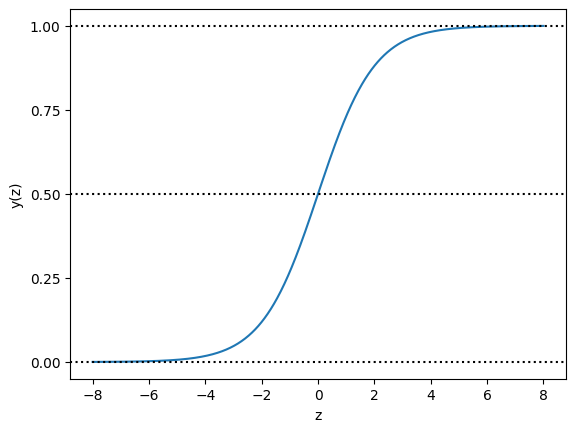

In [10]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

z = np.linspace(-8, 8, 1000)
y = sigmoid(z)

plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()


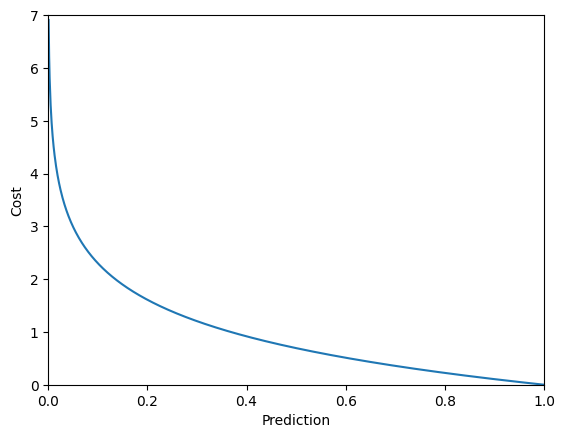

In [11]:
# plot sample cost vs y_hat (prediction), for y (truth) = 1

y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(y_hat)

plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

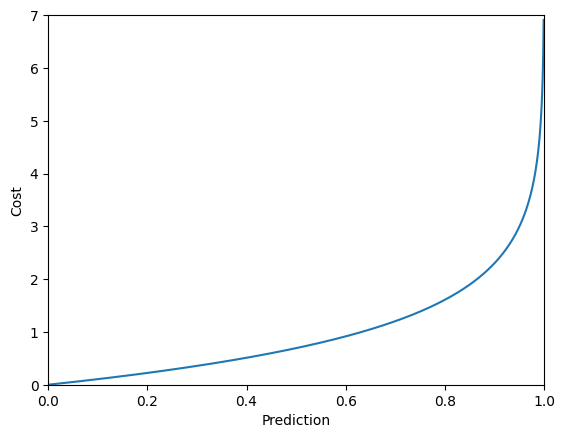

In [12]:

# plot sample cost vs y_hat (prediction), for y (truth) = 0
y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(1 - y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

## Training a logistic regression model

In [13]:
# Gradient descent based logistic regression from scratch
def compute_prediction(X, weights):
    """
    Compute the prediction y_hat based on current weights
    """
    z = np.dot(X, weights)
    return sigmoid(z)

In [14]:
def update_weights_gd(X_train, y_train, weights, learning_rate):
    """
    Update weights by one step
    """
    predictions = compute_prediction(X_train, weights)
    weights_delta = np.dot(X_train.T, y_train - predictions)
    m = y_train.shape[0]
    weights += learning_rate / float(m) * weights_delta
    return weights

In [15]:
def compute_cost(X, y, weights):
    """
     Compute the cost J(w)
    """
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

In [16]:
def train_logistic_regression(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    """ Train a logistic regression model
    Args:
        X_train, y_train (numpy.ndarray, training data set)
        max_iter (int, number of iterations)
        learning_rate (float)
        fit_intercept (bool, with an intercept w0 or not)
    Returns:
        numpy.ndarray, learned weights
    """
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])
    for iteration in range(max_iter):
        weights = update_weights_gd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 100 (for example) iterations
        if iteration % 100 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

In [17]:
def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

In [18]:
# A example
X_train = np.array([[6, 7],
                    [2, 4],
                    [3, 6],
                    [4, 7],
                    [1, 6],
                    [5, 2],
                    [2, 0],
                    [6, 3],
                    [4, 1],
                    [7, 2]])

y_train = np.array([0,
                    0,
                    0,
                    0,
                    0,
                    1,
                    1,
                    1,
                    1,
                    1])


In [19]:
weights = train_logistic_regression(X_train, y_train, max_iter=1000, learning_rate=0.1, fit_intercept=True)


0.5744042371657099
0.034460223392510314
0.018265572708476167
0.012493458388041119
0.00951532913854745
0.007693388060646946
0.0064620943335143306
0.005573511846832282
0.004901632254525041
0.004375567740665165


In [20]:
X_test = np.array([[6, 1],
                   [1, 3],
                   [3, 1],
                   [4, 5]])

predictions = predict(X_test, weights)
print(predictions)

[0.9999478  0.00743991 0.9808652  0.02080847]


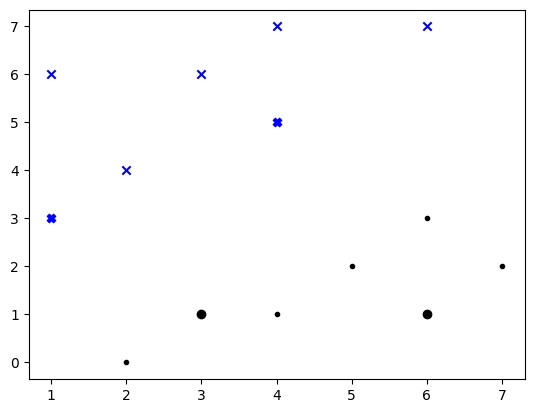

In [21]:
plt.scatter(X_train[:5,0], X_train[:5,1], c='b', marker='x')
plt.scatter(X_train[5:,0], X_train[5:,1], c='k', marker='.')
for i, prediction in enumerate(predictions):
    marker = 'X' if prediction < 0.5 else 'o'
    c = 'b' if prediction < 0.5 else 'k'
    plt.scatter(X_test[i,0], X_test[i,1], c=c, marker=marker)
plt.show()